# Estimating archaic TMRCAs from the real data

In [ ]:
library(tidyverse)
library(magrittr)
library(here)
library(future)
library(bdkn)

plan(multiprocess)

devtools::load_all(".")

── Attaching packages ────────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ───────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract

here() starts at /Users/martin_petr/projects/ychr

Attaching package: ‘bdkn’

The following object is masked from ‘package:ggplot2’:

    %+%

Loading ychr


In [3]:
tmrca_full    %<-% calculate_tmrca(read_gt(here("data/vcf/merged_full.vcf.gz")))
tmrca_full_tv %<-% calculate_tmrca(read_gt(here("data/vcf/merged_full.vcf.gz"), tv_only = TRUE))
tmrca_lippold %<-% calculate_tmrca(read_gt(here("data/vcf/merged_lippold.vcf.gz")))
tmrca_exome   %<-% calculate_tmrca(read_gt(here("data/vcf/merged_exome.vcf.gz")))

In [9]:
tmrca_full %>% group_by(arch) %>% summarise_if(is.numeric, mean)

arch,tmrca_arch,alpha,mut_rate,tmrca_afr,tmrca_ad,tmrca_f,a,b,c,d,e,f,total,p
den8,643847.0,7.658384,7.275693e-10,102433.5,106818.7,98048.32,1166.05102,14.795918,6.5510204,197.66327,241.02041,1154.5918,3546194.5,0.7375622
mez2,354969.8,4.188505,7.275693e-10,102433.5,106818.7,98048.32,196.48980,4.612245,3.2142857,74.18367,81.31633,553.1020,1232666.8,0.5789558
neand,339775.8,3.999934,7.275693e-10,102433.5,106818.7,98048.32,357.88776,7.071429,4.8469388,138.18367,163.14286,782.4388,2384654.1,0.5652740
spy1,301858.0,3.490244,7.275693e-10,102433.5,106818.7,98048.32,70.35714,2.112245,0.5612245,33.42857,35.48980,672.2245,573470.5,0.5245227


In [8]:
tmrca_full_tv %>% group_by(arch) %>% summarise_if(is.numeric, mean)

arch,tmrca_arch,alpha,mut_rate,tmrca_afr,tmrca_ad,tmrca_f,a,b,c,d,e,f,total,p
den8,658412.0,7.637777,4.854902e-10,106271.7,112930.2,99613.19,784.62245,6.4183673,3.2653061,132.41837,163.57143,604.06122,3514583.6,0.7369512
mez2,372905.8,4.316872,4.854902e-10,106271.7,112930.2,99613.19,123.35714,0.6428571,1.7857143,46.10204,48.88776,128.07143,1220162.3,0.5852700
neand,343067.6,3.940613,4.854902e-10,106271.7,112930.2,99613.19,228.66327,2.5510204,2.5612245,91.50000,105.35714,236.03061,2362823.8,0.5600093
spy1,301519.0,3.442238,4.854902e-10,106271.7,112930.2,99613.19,41.18367,1.4795918,0.2755102,22.18367,21.75510,97.91837,567826.5,0.5111906


In [11]:
tmrca_lippold %>% group_by(arch) %>% summarise_if(is.numeric, mean)

arch,tmrca_arch,alpha,mut_rate,tmrca_afr,tmrca_ad,tmrca_f,a,b,c,d,e,f,total,p
den8,380430.3,3.659196,1.639098e-09,106099.5,109814.7,102384.2,100.21429,1.9693878,0.7142857,39.52041,41.20408,89.13265,315743.8,0.5581519
elsidron2,258975.0,2.486672,1.639098e-09,106099.5,109814.7,102384.2,87.65306,2.5408163,3.7142857,69.74490,59.22449,95.72449,434991.1,0.4125384
neand,233209.5,2.247160,1.639098e-09,106099.5,109814.7,102384.2,29.19388,0.7857143,1.0000000,25.75510,24.79592,61.07143,202116.1,0.3737515


In [6]:
tmrca_exome %>% group_by(arch) %>% summarise_if(is.numeric, mean)

arch,tmrca_arch,alpha,mut_rate,tmrca_afr,tmrca_ad,tmrca_f,a,b,c,d,e,f,total,p
den8,630602.0,6.678709,8.839004e-10,102983.4,102108.2,103858.6,12.795918,0.1428571,0,3.285714,2.357143,10.78571,35940.55,0.6994566
elsidron1,359870.7,3.915499,8.839004e-10,102983.4,102108.2,103858.6,8.785714,0.0000000,0,3.571429,3.938776,10.78571,52096.65,0.5544675
neand,Inf,Inf,8.839004e-10,102983.4,102108.2,103858.6,4.857143,0.5714286,0,1.000000,1.000000,12.85714,22021.49,0.7299482


In [34]:
tmrca <- bind_rows(
    mutate(tmrca_full, set = "full"),
    mutate(tmrca_full_tv, set = "full_tv"),
    mutate(tmrca_lippold, set = "lippold"),
    mutate(tmrca_exome, set = "exome")
)

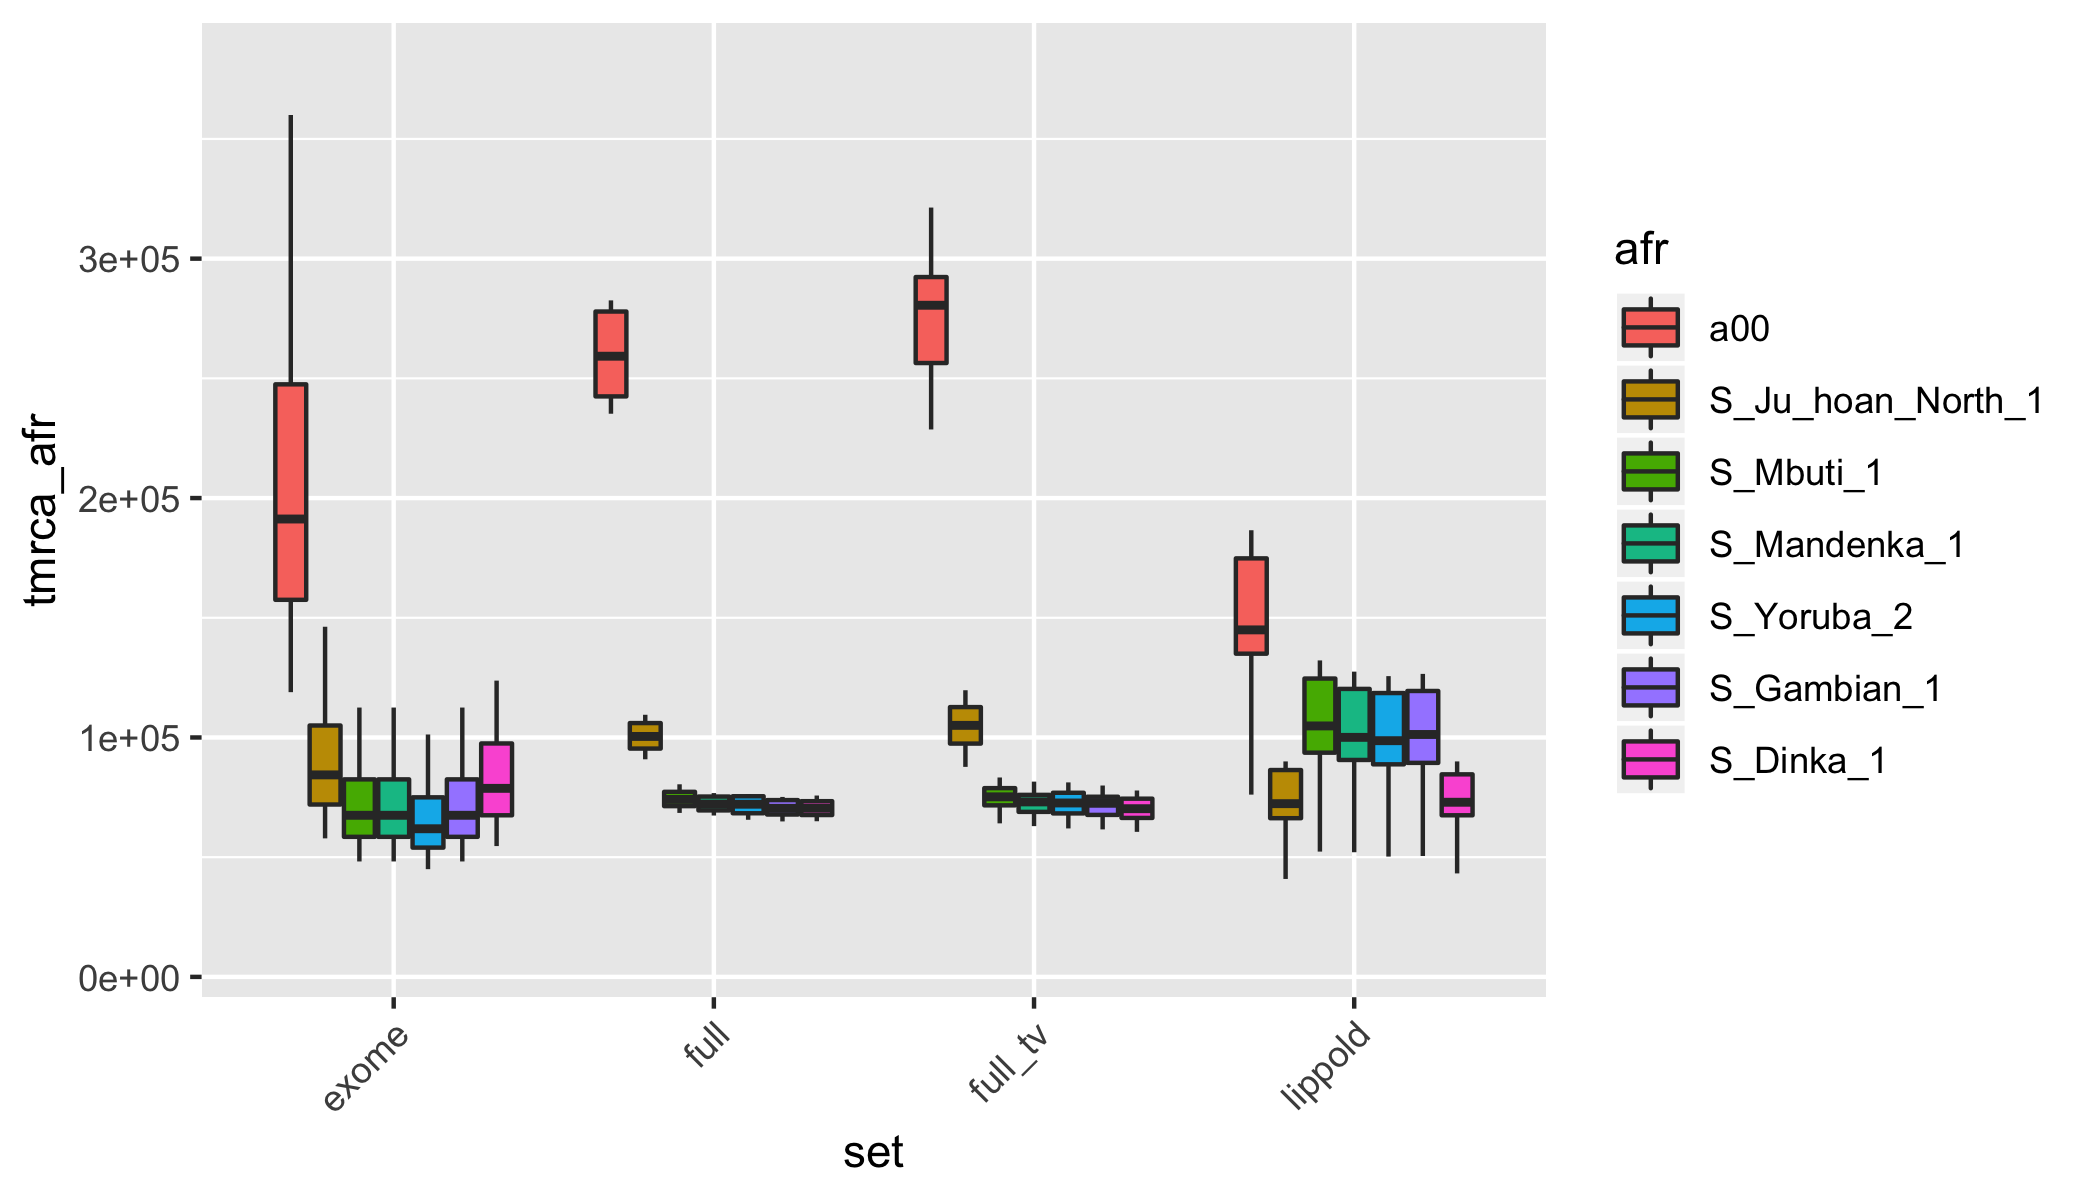

In [133]:
set_dim(7, 4)

tmrca %>%
ggplot(aes(set, tmrca_afr, fill = fct_reorder(afr, tmrca_afr, .desc = TRUE))) +
    geom_boxplot(outlier.shape = NA) +
    coord_cartesian(y = c(10000, 380000)) +
    theme(axis.text.x = element_text(hjust = 1, angle = 45)) +
    guides(fill = guide_legend("afr"))

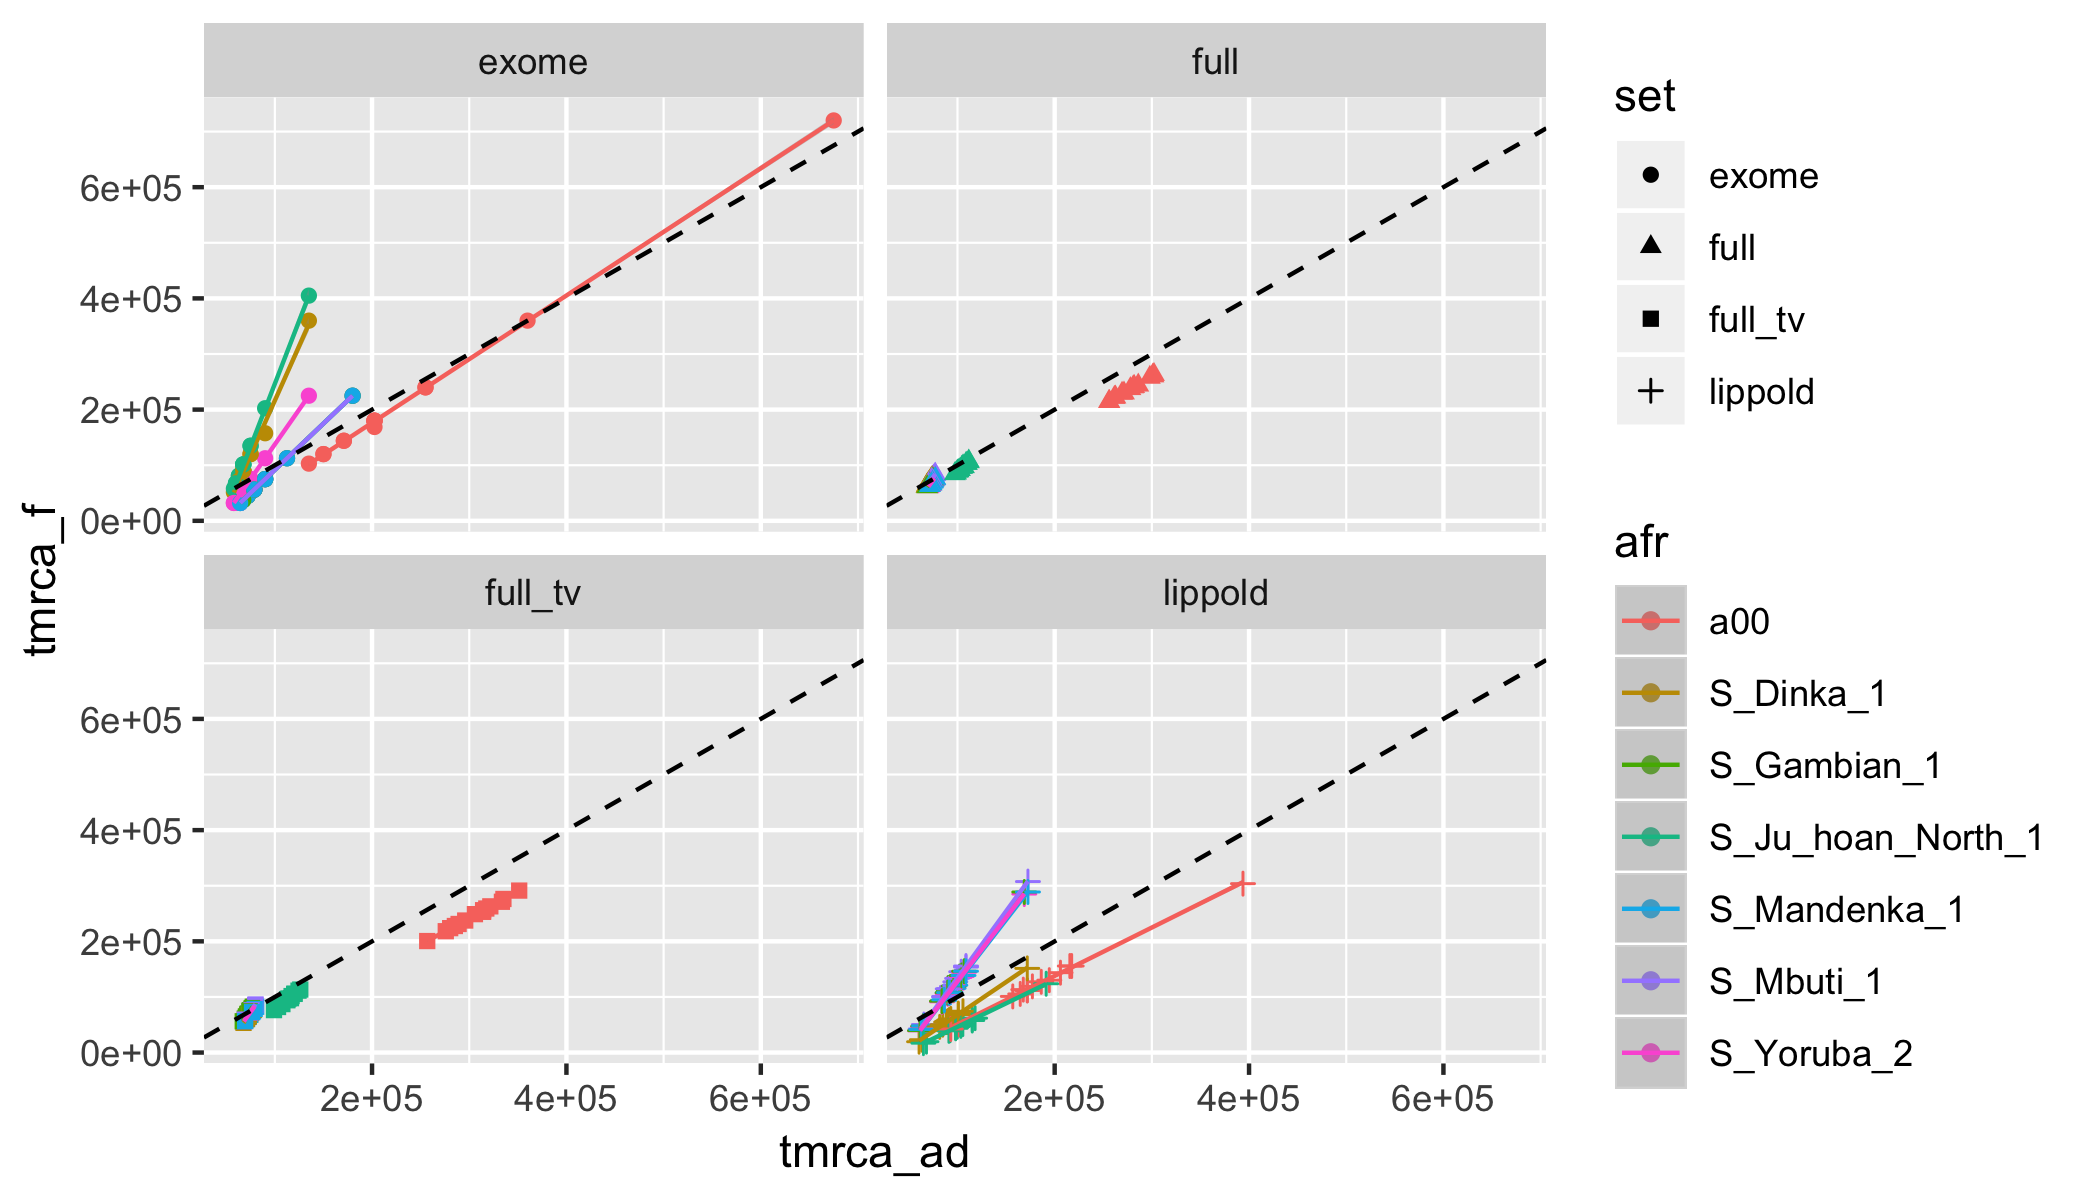

In [134]:
set_dim(7, 4)

filter(tmrca, arch == "den8") %>%
ggplot(aes(tmrca_ad, tmrca_f, color = afr, shape = set)) +
    geom_point() +
    geom_smooth(method = "lm", size = 0.5) +
    geom_abline(slope = 1, linetype = 2) +
    facet_wrap(~ set)

^^^ TMRCAs of A00 are overlapping the ones of other Africans